In [3]:
# Load Exploaratory Data Analysis Packages
import pandas as pd
import numpy as np

In [4]:
# Load Data Visualization Packages
import seaborn as sns

In [6]:
!pip install neattext

     |████████████████████████████████| 112kB 5.2MB/s 


In [7]:
# Load Text Cleaning Packages
import neattext.functions as nfx

In [8]:
# Load ML packages
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [1]:
from google.colab import files
uploaded = files.upload()

Saving emotion_dataset_raw.csv to emotion_dataset_raw.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['emotion_dataset_raw.csv']))

In [11]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

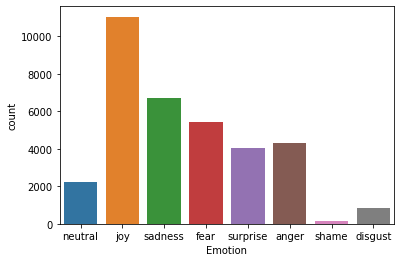

In [12]:
sns.countplot(x='Emotion', data=df)

In [13]:
# Data Cleaning
# Remove user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [14]:
# Remove stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [15]:
# Features and Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [16]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [17]:
# Build pipeline
from sklearn.pipeline import Pipeline

In [18]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
# Train and fit data
pipe_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                             

In [20]:
pipe_lr.score(x_test, y_test)

0.6200421536692853

In [21]:
# Make a prediction
pipe_lr

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                             

In [22]:
txt1 = "That movie was very interesting, I really liked it"

In [24]:
pipe_lr.predict([txt1])

array(['joy'], dtype=object)

In [25]:
# Prediction probability
pipe_lr.predict_proba([txt1])

array([[0.02853917, 0.04951043, 0.0378628 , 0.64699337, 0.00784175,
        0.11001651, 0.00080338, 0.11843258]])

In [27]:
# Display classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [28]:
# Saving the model
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_16_june_2021.pkl","wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()